<a href="https://colab.research.google.com/github/zaid171/Card-Number/blob/master/Resource_management_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA

##package install

In [2]:
# Install if needed:
!pip install pandas numpy plotly streamlit scikit-learn nltk spacy openpyxl

import os, glob, zipfile
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 62.8 MB/s eta 0:00:00


## DRIVE MOUNTED

In [3]:
    from google.colab import drive
    drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##SCIKIT PACKAGE

In [4]:
# (run in terminal or notebook cell with !)
!pip install pandas numpy matplotlib seaborn plotly scikit-learn nltk ydata-profiling python-pptx


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=884192217e15fc6f6ba44667cb7185665575b692b83b28f23a61f5c6a2221d78
  Stored in directory: /root/.cache/pip/wheels/5f/d4/d7/4189b07b5902ee9f3ce0dbb14909fbe

In [1]:
# utils.py
import os
import glob
import pandas as pd
from typing import List

def list_csv_files(data_dir: str) -> List[str]:
    """Return list of csv/xls/xlsx files in data_dir."""
    patterns = ["*.csv", "*.xlsx", "*.xls"]
    files = []
    for p in patterns:
        files.extend(glob.glob(os.path.join(data_dir, p)))
    return sorted(files)

def read_csv_or_excel(path: str) -> pd.DataFrame:
    """Read csv or excel into DataFrame, try common encodings."""
    if path.lower().endswith(".csv"):
        return pd.read_csv(path, low_memory=False)
    else:
        return pd.read_excel(path)


## unzip file

In [6]:
import zipfile, os

zip_path = "/DataSets-20250910T135139Z-1-001.zip"   # change to your uploaded file name
extract_to = "/content"

# make sure target folder exists
os.makedirs(extract_to, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# List first few extracted files
for root, dirs, files in os.walk(extract_to):
    for f in files[:20]:   # preview first 20 files
        print(os.path.join(root, f))


/content/merged_dataset.csv
/content/.config/.last_opt_in_prompt.yaml
/content/.config/default_configs.db
/content/.config/gce
/content/.config/.last_update_check.json
/content/.config/.last_survey_prompt.yaml
/content/.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
/content/.config/config_sentinel
/content/.config/active_config
/content/.config/logs/2025.09.15/17.50.39.268063.log
/content/.config/logs/2025.09.15/17.50.30.378703.log
/content/.config/logs/2025.09.15/17.50.20.154978.log
/content/.config/logs/2025.09.15/17.50.29.040990.log
/content/.config/logs/2025.09.15/17.49.58.939259.log
/content/.config/logs/2025.09.15/17.50.40.013673.log
/content/.config/configurations/config_default
/content/DataSets/DDW_B18sc_3400_NIC_FINAL_STATE_PUDUCHERRY-2011.csv
/content/DataSets/DDW_B18st_1000_NIC_FINAL_STATE_BIHAR-2011.csv
/content/DataSets/DDW_B18_1200_NIC_FINAL_STATE_ARUNACHAL_PRADESH-2011.csv
/content/DataSets/DDW_B18sc_1600_NIC_FINAL_STATE_TRIPURA-2011.csv
/content

##EDA

(21662, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21662 entries, 0 to 21661
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   State Code                           21662 non-null  object
 1   District Code                        21662 non-null  object
 2   India/States                         21662 non-null  object
 3   Division                             21662 non-null  object
 4   Group                                21662 non-null  object
 5   Class                                21662 non-null  object
 6   NIC Name                             21662 non-null  object
 7   Main Workers - Total -  Persons      21662 non-null  int64 
 8   Main Workers - Total - Males         21662 non-null  int64 
 9   Main Workers - Total - Females       21662 non-null  int64 
 10  Main Workers - Rural -  Persons      21662 non-null  int64 
 11  Main Workers - Rural - Males 

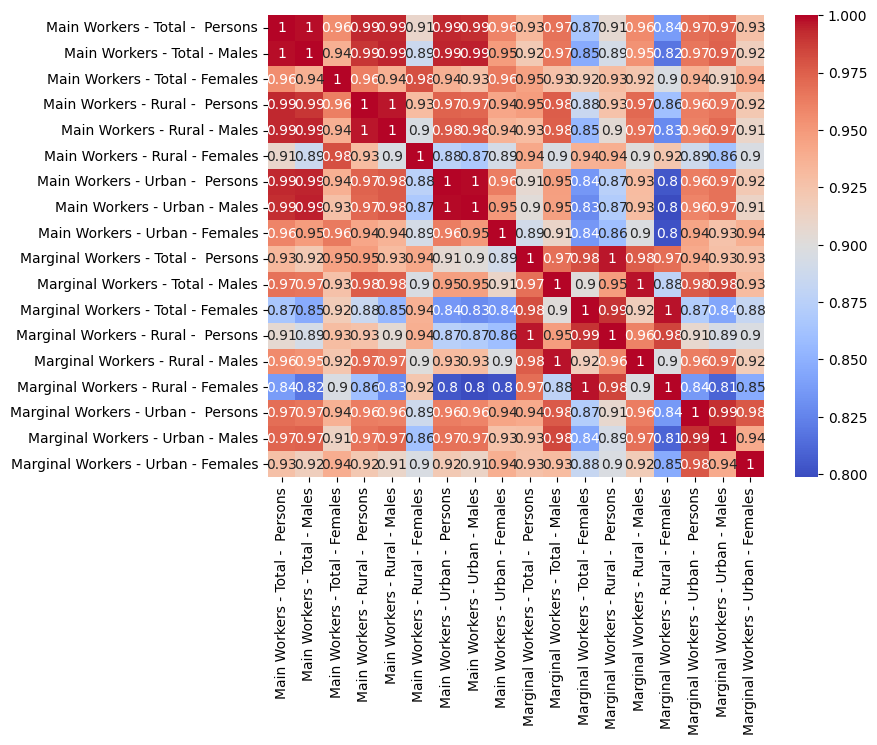

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Import numpy

# Load dataset
df = pd.read_csv("/content/DataSets/DDW_B18_0800_NIC_FINAL_STATE_RAJASTHAN-2011.csv", encoding='latin1')

# 1. Basic info
print(df.shape)         # rows, columns
print(df.info())        # data types, nulls
print(df.head())        # first 5 rows

# 2. Summary stats
print(df.describe())

# 3. Missing values
print(df.isnull().sum())

# 4. Univariate analysis
# Ensure 'age' column exists before plotting
if 'age' in df.columns:
    df['age'].hist(bins=20)
    plt.title("Age Distribution")
    plt.show()
else:
    print("Warning: 'age' column not found for distribution plot.")


# 5. Categorical variable analysis
# Ensure 'gender' column exists before analysis
if 'gender' in df.columns:
    print(df['gender'].value_counts())
    sns.countplot(x='gender', data=df)
    plt.show()
else:
     print("Warning: 'gender' column not found for categorical analysis.")


# 6. Correlation
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=np.number)
if not numeric_df.empty:
    plt.figure(figsize=(8,6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
    plt.show()
else:
    print("Warning: No numeric columns found for correlation analysis.")

(6554, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6554 entries, 0 to 6553
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   State Code                           6554 non-null   object
 1   District Code                        6554 non-null   object
 2   India/States                         6554 non-null   object
 3   Division                             6554 non-null   object
 4   Group                                6554 non-null   object
 5   Class                                6554 non-null   object
 6   NIC Name                             6554 non-null   object
 7   Main Workers - Total -  Persons      6554 non-null   int64 
 8   Main Workers - Total - Males         6554 non-null   int64 
 9   Main Workers - Total - Females       6554 non-null   int64 
 10  Main Workers - Rural -  Persons      6554 non-null   int64 
 11  Main Workers - Rural - Males    

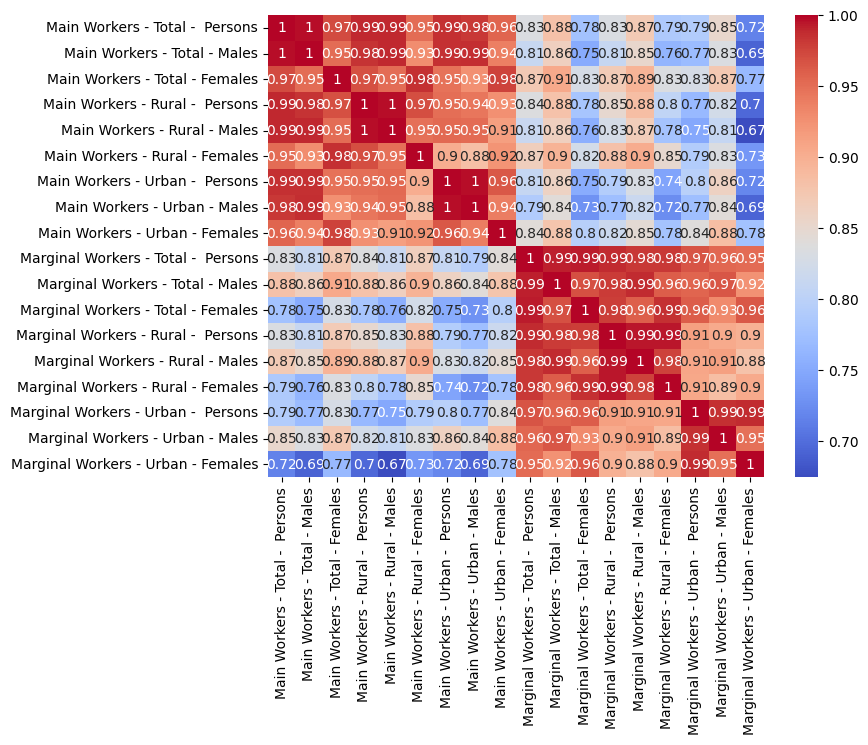

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/DataSets/DDW_B18_1200_NIC_FINAL_STATE_ARUNACHAL_PRADESH-2011.csv", encoding='latin1')

# 1. Basic info
print(df.shape)         # rows, columns
print(df.info())        # data types, nulls
print(df.head())        # first 5 rows

# 2. Summary stats
print(df.describe())

# 3. Missing values
print(df.isnull().sum())

# 4. Univariate analysis
# Ensure 'age' column exists before plotting
if 'age' in df.columns:
    df['age'].hist(bins=20)
    plt.title("Age Distribution")
    plt.show()
else:
    print("Warning: 'age' column not found for distribution plot.")


# 5. Categorical variable analysis
# Ensure 'gender' column exists before analysis
if 'gender' in df.columns:
    print(df['gender'].value_counts())
    sns.countplot(x='gender', data=df)
    plt.show()
else:
     print("Warning: 'gender' column not found for categorical analysis.")


# 6. Correlation
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=np.number)
if not numeric_df.empty:
    plt.figure(figsize=(8,6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
    plt.show()
else:
    print("Warning: No numeric columns found for correlation analysis.")

In [9]:
import os, glob
import pandas as pd

# Path to unzipped dataset
DATA_DIR = "/content/DataSets"   # Change to the directory where the zip was extracted

# 1. List all CSV/XLSX files in the folder
def list_data_files(data_dir=DATA_DIR):
    patterns = ["*.csv", "*.xlsx", "*.xls"]
    files = []
    for p in patterns:
        files.extend(glob.glob(os.path.join(data_dir, p)))
    return sorted(files)

files = list_data_files()
print("Found files:", files)

# 2. Load safely into pandas
def read_file_safe(path):
    if path.lower().endswith(".csv"):
        return pd.read_csv(path, low_memory=False)
    else:
        return pd.read_excel(path)

dfs = []
for f in files:
    try:
        df_temp = read_file_safe(f)
        df_temp['__source_file'] = os.path.basename(f)  # track source
        dfs.append(df_temp)
        print(f"Loaded {f} → shape {df_temp.shape}")
    except Exception as e:
        print(f"Could not read {f}: {e}")

# 3. Merge into single DataFrame
if dfs:
    df = pd.concat(dfs, ignore_index=True, sort=False)
    print("Merged dataset shape:", df.shape)
else:
    raise SystemExit("No datasets could be loaded!")

Found files: ['/content/DataSets/DDW_B18_0800_NIC_FINAL_STATE_RAJASTHAN-2011.csv', '/content/DataSets/DDW_B18_1200_NIC_FINAL_STATE_ARUNACHAL_PRADESH-2011.csv', '/content/DataSets/DDW_B18_1400_NIC_FINAL_STATE_MANIPUR-2011.csv', '/content/DataSets/DDW_B18_1500_NIC_FINAL_STATE_MIZORAM-2011.csv', '/content/DataSets/DDW_B18_1900_NIC_FINAL_STATE_WEST_BENGAL-2011.csv', '/content/DataSets/DDW_B18sc_0700_NIC_FINAL_STATE_NCT_OF_DELHI-2011.csv', '/content/DataSets/DDW_B18sc_1600_NIC_FINAL_STATE_TRIPURA-2011.csv', '/content/DataSets/DDW_B18sc_2000_NIC_FINAL_STATE_JHARKHAND-2011.csv', '/content/DataSets/DDW_B18sc_2400_NIC_FINAL_STATE_GUJARAT-2011.csv', '/content/DataSets/DDW_B18sc_2700_NIC_FINAL_STATE_MAHARASHTRA-2011.csv', '/content/DataSets/DDW_B18sc_2900_NIC_FINAL_STATE_KARNATAKA-2011.csv', '/content/DataSets/DDW_B18sc_3000_NIC_FINAL_STATE_GOA-2011.csv', '/content/DataSets/DDW_B18sc_3200_NIC_FINAL_STATE_KERALA-2011.csv', '/content/DataSets/DDW_B18sc_3300_NIC_FINAL_STATE_TAMIL_NADU-2011.csv', '/c

In [10]:
import pandas as pd

def read_file_safe(path):
    try:
        if path.lower().endswith(".csv"):
            return pd.read_csv(path, encoding="utf-8", low_memory=False)
        else:
            return pd.read_excel(path)
    except UnicodeDecodeError:
        # fallback for non-UTF-8 files
        if path.lower().endswith(".csv"):
            return pd.read_csv(path, encoding="latin1", low_memory=False)
        else:
            return pd.read_excel(path)


In [11]:
import os, glob

DATA_DIR = "/content/DataSets"   # adjust path

def list_data_files(data_dir=DATA_DIR):
    patterns = ["*.csv", "*.xlsx", "*.xls"]
    files = []
    for p in patterns:
        files.extend(glob.glob(os.path.join(data_dir, p)))
    return sorted(files)

files = list_data_files()
print("Found files:", len(files))

dfs = []
for f in files:
    try:
        df_temp = read_file_safe(f)
        df_temp['__source_file'] = os.path.basename(f)
        dfs.append(df_temp)
        print(f"Loaded {f} → shape {df_temp.shape}")
    except Exception as e:
        print(f"❌ Could not read {f}: {e}")

# Merge
if dfs:
    df = pd.concat(dfs, ignore_index=True, sort=False)
    print("✅ Final merged dataset shape:", df.shape)
else:
    print("No datasets could be loaded")


Found files: 23
Loaded /content/DataSets/DDW_B18_0800_NIC_FINAL_STATE_RAJASTHAN-2011.csv → shape (21662, 26)
Loaded /content/DataSets/DDW_B18_1200_NIC_FINAL_STATE_ARUNACHAL_PRADESH-2011.csv → shape (6554, 26)
Loaded /content/DataSets/DDW_B18_1400_NIC_FINAL_STATE_MANIPUR-2011.csv → shape (4811, 26)
Loaded /content/DataSets/DDW_B18_1500_NIC_FINAL_STATE_MIZORAM-2011.csv → shape (3981, 26)
Loaded /content/DataSets/DDW_B18_1900_NIC_FINAL_STATE_WEST_BENGAL-2011.csv → shape (13830, 26)
Loaded /content/DataSets/DDW_B18sc_0700_NIC_FINAL_STATE_NCT_OF_DELHI-2011.csv → shape (5997, 26)
Loaded /content/DataSets/DDW_B18sc_1600_NIC_FINAL_STATE_TRIPURA-2011.csv → shape (2021, 26)
Loaded /content/DataSets/DDW_B18sc_2000_NIC_FINAL_STATE_JHARKHAND-2011.csv → shape (9443, 26)
Loaded /content/DataSets/DDW_B18sc_2400_NIC_FINAL_STATE_GUJARAT-2011.csv → shape (11076, 26)
Loaded /content/DataSets/DDW_B18sc_2700_NIC_FINAL_STATE_MAHARASHTRA-2011.csv → shape (18181, 26)
Loaded /content/DataSets/DDW_B18sc_2900_NIC

In [12]:
import os, glob
import pandas as pd

DATA_DIR = "/content/DataSets"   # adjust path

def list_data_files(data_dir=DATA_DIR):
    patterns = ["*.csv", "*.xlsx", "*.xls"]
    files = []
    for p in patterns:
        files.extend(glob.glob(os.path.join(data_dir, p)))
    return sorted(files)

def read_file_safe(path):
    """Try reading CSV or Excel safely with encoding fallback."""
    try:
        if path.lower().endswith(".csv"):
            return pd.read_csv(path, encoding="utf-8", low_memory=False)
        else:
            return pd.read_excel(path)
    except UnicodeDecodeError:
        return pd.read_csv(path, encoding="latin1", low_memory=False)

files = list_data_files()
print("Found files:", len(files))

dfs = []
for f in files:
    try:
        df_temp = read_file_safe(f)
        df_temp['__source_file'] = os.path.basename(f)
        dfs.append(df_temp)
        print(f"Loaded {f} → shape {df_temp.shape}")
    except Exception as e:
        print(f"❌ Could not read {f}: {e}")

# Merge & save
if dfs:
    df = pd.concat(dfs, ignore_index=True, sort=False)
    print("✅ Final merged dataset shape:", df.shape)

    # Save as CSV
    out_path = "/content/merged_dataset.csv"
    df.to_csv(out_path, index=False)
    print("💾 Saved merged dataset to:", out_path)

    # (Optional) Save as Excel
    df.to_excel("/content/merged_dataset.xlsx", index=False)
    print("💾 Also saved as Excel:", "/content/merged_dataset.xlsx")
else:
    print("No datasets could be loaded")


Found files: 23
Loaded /content/DataSets/DDW_B18_0800_NIC_FINAL_STATE_RAJASTHAN-2011.csv → shape (21662, 26)
Loaded /content/DataSets/DDW_B18_1200_NIC_FINAL_STATE_ARUNACHAL_PRADESH-2011.csv → shape (6554, 26)
Loaded /content/DataSets/DDW_B18_1400_NIC_FINAL_STATE_MANIPUR-2011.csv → shape (4811, 26)
Loaded /content/DataSets/DDW_B18_1500_NIC_FINAL_STATE_MIZORAM-2011.csv → shape (3981, 26)
Loaded /content/DataSets/DDW_B18_1900_NIC_FINAL_STATE_WEST_BENGAL-2011.csv → shape (13830, 26)
Loaded /content/DataSets/DDW_B18sc_0700_NIC_FINAL_STATE_NCT_OF_DELHI-2011.csv → shape (5997, 26)
Loaded /content/DataSets/DDW_B18sc_1600_NIC_FINAL_STATE_TRIPURA-2011.csv → shape (2021, 26)
Loaded /content/DataSets/DDW_B18sc_2000_NIC_FINAL_STATE_JHARKHAND-2011.csv → shape (9443, 26)
Loaded /content/DataSets/DDW_B18sc_2400_NIC_FINAL_STATE_GUJARAT-2011.csv → shape (11076, 26)
Loaded /content/DataSets/DDW_B18sc_2700_NIC_FINAL_STATE_MAHARASHTRA-2011.csv → shape (18181, 26)
Loaded /content/DataSets/DDW_B18sc_2900_NIC

In [ ]:
merged_df.to_csv("/content/merged_dataset.csv", index=False)
print("✅ Merged dataset saved as /content/merged_dataset.csv")


In [13]:
# Save merged dataset to /content
output_path = "/content/merged_dataset.csv"
df.to_csv(output_path, index=False)

print(f"✅ Merged dataset saved at: {output_path}")


✅ Merged dataset saved at: /content/merged_dataset.csv


In [14]:
print("Rows,cols:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nDtypes:\n", df.dtypes)
print("\nFirst rows:\n", df.head().T)

# Missing values
print("\nMissing values per column:")
print(df.isnull().sum().sort_values(ascending=False))


Rows,cols: (195145, 26)

Columns:
 ['State Code', 'District Code', 'India/States', 'Division', 'Group', 'Class', 'NIC Name', 'Main Workers - Total -  Persons', 'Main Workers - Total - Males', 'Main Workers - Total - Females', 'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males', 'Main Workers - Rural - Females', 'Main Workers - Urban -  Persons', 'Main Workers - Urban - Males', 'Main Workers - Urban - Females', 'Marginal Workers - Total -  Persons', 'Marginal Workers - Total - Males', 'Marginal Workers - Total - Females', 'Marginal Workers - Rural -  Persons', 'Marginal Workers - Rural - Males', 'Marginal Workers - Rural - Females', 'Marginal Workers - Urban -  Persons', 'Marginal Workers - Urban - Males', 'Marginal Workers - Urban - Females', '__source_file']

Dtypes:
 State Code                             object
District Code                          object
India/States                           object
Division                               object
Group                 

In [15]:
# Shape
print("Rows, cols:", df.shape)

# Column names
print("\nColumns:\n", df.columns.tolist())

# Data types
print("\nDtypes:\n", df.dtypes)

# First few rows (transposed for readability)
print("\nFirst rows:\n", df.head().T)

# Missing values summary
print("\nMissing values per column:")
print(df.isnull().sum().sort_values(ascending=False))


Rows, cols: (195145, 26)

Columns:
 ['State Code', 'District Code', 'India/States', 'Division', 'Group', 'Class', 'NIC Name', 'Main Workers - Total -  Persons', 'Main Workers - Total - Males', 'Main Workers - Total - Females', 'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males', 'Main Workers - Rural - Females', 'Main Workers - Urban -  Persons', 'Main Workers - Urban - Males', 'Main Workers - Urban - Females', 'Marginal Workers - Total -  Persons', 'Marginal Workers - Total - Males', 'Marginal Workers - Total - Females', 'Marginal Workers - Rural -  Persons', 'Marginal Workers - Rural - Males', 'Marginal Workers - Rural - Females', 'Marginal Workers - Urban -  Persons', 'Marginal Workers - Urban - Males', 'Marginal Workers - Urban - Females', '__source_file']

Dtypes:
 State Code                             object
District Code                          object
India/States                           object
Division                               object
Group                

In [16]:
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

expected = ["state", "industry", "sex", "worker_type", "count"]
print("Detected expected columns present:", {col: (col in df.columns) for col in expected})

# If count is not present but a numeric column exists, map it:
if "count" not in df.columns:
    num_cols = df.select_dtypes(include='number').columns.tolist()
    if num_cols:
        print("No 'count' column; using numeric column:", num_cols[0])
        df = df.rename(columns={num_cols[0]: "count"})
    else:
        raise SystemExit("No numeric column found to use as 'count'.")

# Normalize text columns if present
for col in ["state", "industry", "sex", "worker_type"]:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()

# Convert count to integer
df['count'] = pd.to_numeric(df['count'], errors='coerce').fillna(0).astype(int)

# Drop exact duplicates (optional)
dup_before = df.shape[0]
df = df.drop_duplicates()
print("Dropped duplicates:", dup_before - df.shape[0])


Detected expected columns present: {'state': False, 'industry': False, 'sex': False, 'worker_type': False, 'count': False}
No 'count' column; using numeric column: main_workers_-_total_-__persons
Dropped duplicates: 0


count    1.951450e+05
mean     1.492138e+03
std      4.568169e+04
min      0.000000e+00
25%      6.000000e+00
50%      2.800000e+01
75%      1.880000e+02
max      1.561976e+07
Name: count, dtype: float64


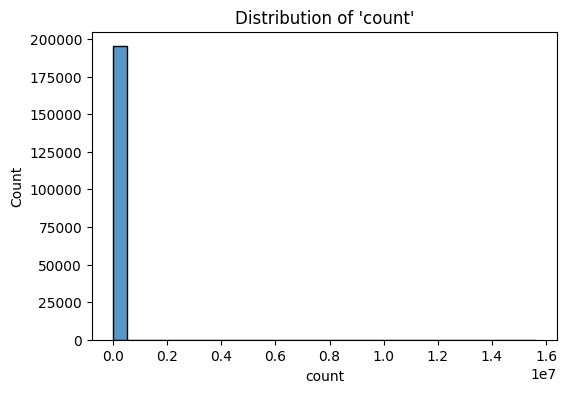

In [17]:
# Numeric summary
print(df['count'].describe())

# Histogram
plt.figure(figsize=(6,4))
sns.histplot(df['count'], bins=30)
plt.title("Distribution of 'count'")
plt.show()

# Top categories
for cat in ["state", "industry", "sex", "worker_type"]:
    if cat in df.columns:
        print(f"\nTop values for {cat}:")
        print(df[cat].value_counts().head(10))
        sns.countplot(y=cat, data=df, order=df[cat].value_counts().index[:10])
        plt.title(f"Top 10 {cat}")
        plt.show()


In [18]:
# Aggregation: total workers per state
if 'state' in df.columns:
    st = df.groupby('state', as_index=False)['count'].sum().sort_values('count', ascending=False)
    print(st.head(15))
    fig = px.bar(st.head(15), x='count', y='state', orientation='h', title='Top 15 states by worker count')
    fig.show()

# Male vs female by state (if sex present)
if 'sex' in df.columns and 'state' in df.columns:
    mf = df.groupby(['state','sex'], as_index=False)['count'].sum()
    fig = px.bar(mf, x='state', y='count', color='sex', title='Male vs Female by State')
    fig.update_layout(xaxis={'categoryorder':'total descending'})
    fig.show()

# Top industries
if 'industry' in df.columns:
    ind = df.groupby('industry', as_index=False)['count'].sum().sort_values('count', ascending=False)
    print(ind.head(20))
    fig = px.bar(ind.head(20), x='count', y='industry', orientation='h', title='Top 20 industries')
    fig.show()


In [19]:
# Standardize column names first
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

# Check and standardize potential 'state' and 'industry' columns
# Standardize 'state' column
potential_state_cols = ['state/ut', 'india/states', 'state']
state_col = None
for col in potential_state_cols:
    if col in df.columns:
        state_col = col
        break
if state_col and state_col != 'state':
     df.rename(columns={state_col: "state"}, inplace=True)
elif not state_col and 'state' not in df.columns:
    print("Warning: No 'state' column found or inferable.")


# Standardize 'industry' column
potential_industry_cols = ['industry_name', 'industry_description', 'description', 'division_group', 'group', 'nic_name'] # Added nic_name based on dataframe head
industry_col = None
for col in potential_industry_cols:
    if col in df.columns:
        industry_col = col
        break

if industry_col and industry_col != 'industry':
     df.rename(columns={industry_col: "industry"}, inplace=True)
elif not industry_col and 'industry' not in df.columns:
     print("Warning: No 'industry' column found or inferable.")

# Also standardize 'count' column to ensure it exists
potential_count_cols = ['count', 'persons', 'workers', 'total']
count_col = None
for col in potential_count_cols:
    if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
         count_col = col
         break
# If no numeric count column found, check for non-numeric columns that might contain counts
if count_col is None:
     for col in potential_count_cols:
         if col in df.columns:
              count_col = col
              break

if count_col and count_col != 'count':
     df.rename(columns={count_col: "count"}, inplace=True)
elif not count_col and 'count' not in df.columns:
     print("Warning: No 'count' column found or inferable.")


# Rows with missing key info - Now check for the standardized column names
key_cols_to_check = []
if 'state' in df.columns:
    key_cols_to_check.append('state')
if 'industry' in df.columns:
    key_cols_to_check.append('industry')
if 'count' in df.columns:
    key_cols_to_check.append('count')


if key_cols_to_check:
    key_missing = df[df[key_cols_to_check].isnull().any(axis=1)]
    print("Rows missing key info:", key_missing.shape[0])
    # Example imputation: drop rows with empty industry OR state
    # Only drop if 'state' or 'industry' columns exist
    subset_cols_to_drop = [col for col in ['state', 'industry'] if col in df.columns]
    if subset_cols_to_drop:
         df_clean = df.dropna(subset=subset_cols_to_drop)
    else:
         df_clean = df.copy() # If state or industry missing, just make a copy
         print("Warning: Cannot drop rows based on missing 'state' or 'industry' as columns not found.")

else:
    print("Warning: Cannot check for missing key info as required columns are missing.")
    df_clean = df.copy() # If no key columns to check, just make a copy

Rows missing key info: 0


## NLP

In [20]:
# Simple rule-based bucket mapping
RULE_BASED_BUCKETS = {
    "retail": ["retail","shop","store","wholesale"],
    "manufacturing": ["manufactur","factory","product","plant"],
    "construction": ["construction","building","contractor"],
    "food": ["poultry","food","bakery","meat","dairy"],
    "chemical": ["chemical","pharma","petro"],
    "textiles": ["textile","garment","clothing"],
    "services": ["service","it ","consult","hotel","hospital"],
    "transport": ["transport","logistic","shipping","rail","truck"]
}
def rule_bucket(s):
    t = str(s).lower()
    for b, kws in RULE_BASED_BUCKETS.items():
        for kw in kws:
            if kw in t:
                return b
    return "other"

if 'industry' in df.columns:
    df['bucket_rule'] = df['industry'].apply(rule_bucket)
    print(df['bucket_rule'].value_counts().head(20))


bucket_rule
other    195145
Name: count, dtype: int64


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer
from sklearn.cluster import KMeans # Import KMeans
from sklearn.decomposition import TruncatedSVD # Import TruncatedSVD
import pandas as pd # Import pandas if not already available

def cluster_other_industries(df, n_clusters=6):
    mask = df['bucket_rule']=='other'
    corpus = df.loc[mask, 'industry'].fillna('unknown').astype(str)
    vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=0.8)
    X = vect.fit_transform(corpus)
    svd = TruncatedSVD(n_components=min(50, X.shape[1]-1))
    Xred = svd.fit_transform(X)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(Xred)
    df.loc[mask, 'bucket_nlp'] = ['cluster_'+str(x) for x in labels]
    return df

df = cluster_other_industries(df, n_clusters=6)
print(df['bucket_nlp'].value_counts().head())

bucket_nlp
cluster_0    155643
cluster_2     31682
cluster_3      2479
cluster_5      2250
cluster_4      1627
Name: count, dtype: int64


In [22]:
# Install a compatible version of numpy before importing ydata-profiling
!pip install numpy<2.1 --force-reinstall

from ydata_profiling import ProfileReport # Import ProfileReport

# This produces a large HTML report you can open in notebook or browser
profile = ProfileReport(df, title="Resource Management EDA", minimal=True)
profile.to_file("eda_report.html")
print("EDA report saved: eda_report.html")

/bin/bash: line 1: 2.1: No such file or directory


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 28/28 [00:01<00:00, 14.53it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

EDA report saved: eda_report.html


In [23]:
df.to_csv("cleaned_resource_management.csv", index=False)
print("Saved cleaned csv")


Saved cleaned csv


## -u kaleido

In [24]:
# Install kaleido for static image export
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 3.6 MB/s eta 0:00:00


In [25]:
RULE_BASED_BUCKETS = {
    "retail": ["retail", "shop", "store", "wholesale"],
    "manufacturing": ["manufactur", "factory", "product", "plant"],
    "construction": ["construction", "building", "contractor"],
    "food_processing": ["poultry", "food", "slaughter", "meat", "dairy", "bakery"],
    "chemical": ["chemical", "petro", "pharma"],
    "textiles": ["textile", "garment", "clothing"],
    "services": ["service", "it ", "consult"],
    "transport": ["transport", "logistic", "shipping", "rail", "truck"],
}

def rule_based_bucket(industry: str) -> str:
    t = str(industry).lower()
    for bucket, keywords in RULE_BASED_BUCKETS.items():
        for kw in keywords:
            if kw in t:
                return bucket
    return "other"

def cluster_industries(df: pd.DataFrame, n_clusters: int = 6, text_col: str = "industry"):
    corpus = df[text_col].astype(str).fillna("unknown").values
    vect = TfidfVectorizer(stop_words="english", ngram_range=(1,2), max_df=0.8)
    X = vect.fit_transform(corpus)
    svd = TruncatedSVD(n_components=min(100, X.shape[1]-1))
    Xred = svd.fit_transform(X)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    df["nlp_cluster"] = kmeans.fit_predict(Xred)
    return df

def add_bucket_column(df: pd.DataFrame) -> pd.DataFrame:
    df["bucket_rule"] = df["industry"].apply(rule_based_bucket)
    df_other = df[df["bucket_rule"] == "other"].copy()
    if not df_other.empty:
        df_other = cluster_industries(df_other, n_clusters=6)
        df.loc[df_other.index, "bucket_nlp"] = "cluster_" + df_other["nlp_cluster"].astype(str)
    df["final_bucket"] = df["bucket_rule"].where(df["bucket_rule"]!="other", df.get("bucket_nlp","other"))
    return df


In [26]:
df.head

<bound method NDFrame.head of        state_code district_code                  state division industry  \
0             `08          `000      STATE - RAJASTHAN      `00     `000   
1             `08          `000      STATE - RAJASTHAN      `01     `000   
2             `08          `000      STATE - RAJASTHAN      `01     `011   
3             `08          `000      STATE - RAJASTHAN      `01     `011   
4             `08          `000      STATE - RAJASTHAN      `01     `011   
...           ...           ...                    ...      ...      ...   
195140        `21          `399  District - Malkangiri      `99     `000   
195141        `21          `399  District - Malkangiri      `99     `991   
195142        `21          `399  District - Malkangiri      `99     `991   
195143        `21          `399  District - Malkangiri      `99     `992   
195144        `21          `399  District - Malkangiri      `99     `992   

        class                                           nic_name    count  \
0       `0000                                              Total  9017944   
1       `0000  Crop and animal production, hunting and relate...   450766   
2       `0000                     Growing of non-perennial crops    12876   
3       `0111  Growing of cereals (except rice), leguminous c...    12061   
4       `0112                                    Growing of rice       79   
...       ...                                                ...      ...   
195140  `0000  Activities of extraterritorial organizations a...      574   
195141  `0000                                              Blank      435   
195142  `9910                                              Blank      435   
195143  `0000          Incomplete description/ Wrongly Classifed      139   
195144  `9920          Incomplete description/ Wrongly Classifed      139   

        main_workers_-_total_-_males  main_workers_-_total_-_females  ...  \
0                            7594737                         1423207  ...   
1                             201572                          249194  ...   
2                              10547                            2329  ...   
3                               9911                            2150  ...   
4                                 71                               8  ...   
...                              ...                             ...  ...   
195140                           315                             259  ...   
195141                           266                             169  ...   
195142                           266                             169  ...   
195143                            49                              90  ...   
195144                            49                              90  ...   

        marginal_workers_-_total_-_females  \
0                                  1260939   
1                                   332622   
2                                     5511   
3                                     5202   
4                                        9   
...                                    ...   
195140                                 928   
195141                                 384   
195142                                 384   
195143                                 544   
195144                                 544   

        marginal_workers_-_rural_-__persons  marginal_workers_-_rural_-_males  \
0                                   1825830                            749381   
1                                    390864                             71124   
2                                      8147                              3295   
3                                      7777                              3161   
4                                        11                                 2   
...                                     ...                               ...   
195140                                 1176                               286   
195141

In [27]:
pd.read_csv("/content/cleaned_resource_management.csv")

,state_code,district_code,state,division,industry,class,nic_name,count,main_workers_-_total_-_males,main_workers_-_total_-_females,...,marginal_workers_-_total_-_females,marginal_workers_-_rural_-__persons,marginal_workers_-_rural_-_males,marginal_workers_-_rural_-_females,marginal_workers_-_urban_-__persons,marginal_workers_-_urban_-_males,marginal_workers_-_urban_-_females,__source_file,bucket_rule,bucket_nlp
0,`08,`000,STATE - RAJASTHAN,`00,`000,`0000,Total,9017944,7594737,1423207,...,1260939,1825830,749381,1076449,481922,297432,184490,DDW_B18_0800_NIC_FINAL_STATE_RAJASTHAN-2011.csv,other,cluster_2
1,`08,`000,STATE - RAJASTHAN,`01,`000,`0000,"Crop and animal production, hunting and relate...",450766,201572,249194,...,332622,390864,71124,319740,17864,4982,12882,DDW_B18_0800_NIC_FINAL_STATE_RAJASTHAN-2011.csv,other,cluster_2
2,`08,`000,STATE - RAJASTHAN,`01,`011,`0000,Growing of non-perennial crops,12876,10547,2329,...,5511,8147,3295,4852,1415,756,659,DDW_B18_0800_NIC_FINAL_STATE_RAJASTHAN-2011.csv,other,cluster_0
3,`08,`000,STATE - RAJASTHAN,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",12061,9911,2150,...,5202,7777,3161,4616,1308,722,586,DDW_B18_0800_NIC_FINAL_STATE_RAJASTHAN-2011.csv,other,cluster_0
4,`08,`000,STATE - RAJASTHAN,`01,`011,`0112,Growing of rice,79,71,8,...,9,11,2,9,2,2,0,DDW_B18_0800_NIC_FINAL_STATE_RAJASTHAN-2011.csv,other,cluster_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195140,`21,`399,District - Malkangiri,`99,`000,`0000,Activities of extraterritorial organizations a...,574,315,259,...,928,1176,286,890,46,8,38,DDW_B18st_2100_NIC_FINAL_STATE_ODISHA-2011.csv,other,cluster_2
195141,`21,`399,District - Malkangiri,`99,`991,`0000,Blank,435,266,169,...,384,558,198,360,28,4,24,DDW_B18st_2100_NIC_FINAL_STATE_ODISHA-2011.csv,other,cluster_0
195142,`21,`399,District - Malkangiri,`99,`991,`9910,Blank,435,266,169,...,384,558,198,360,28,4,24,DDW_B18st_2100_NIC_FINAL_STATE_ODISHA-2011.csv,other,cluster_0
195143,`21,`399,District - Malkangiri,`99,`992,`0000,Incomplete description/ Wrongly Classifed,139,49,90,...,544,618,88,530,18,4,14,DDW_B18st_2100_NIC_FINAL_STATE_ODISHA-2011.csv,other,cluster_0


In [28]:
import pandas as pd

# Assuming df is your merged dataset
print("Before filling missing values:")
print(df.isnull().sum().sort_values(ascending=False).head(10))

# Separate numeric and categorical columns
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill numeric columns with median
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical columns with mode or "Unknown"
for col in cat_cols:
    if not df[col].mode().empty:
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna("Unknown")

print("\nAfter filling missing values:")
print(df.isnull().sum().sort_values(ascending=False).head(10))

# Save cleaned dataset
output_path = "/content/cleaned_resource_management.csv"
df.to_csv(output_path, index=False)
print(f"\n✅ Cleaned dataset saved at: {output_path}")


Before filling missing values:
state_code                        0
district_code                     0
state                             0
division                          0
industry                          0
class                             0
nic_name                          0
count                             0
main_workers_-_total_-_males      0
main_workers_-_total_-_females    0
dtype: int64

After filling missing values:
state_code                        0
district_code                     0
state                             0
division                          0
industry                          0
class                             0
nic_name                          0
count                             0
main_workers_-_total_-_males      0
main_workers_-_total_-_females    0
dtype: int64

✅ Cleaned dataset saved at: /content/cleaned_resource_management.csv


In [29]:
df.head

<bound method NDFrame.head of        state_code district_code                  state division industry  \
0             `08          `000      STATE - RAJASTHAN      `00     `000   
1             `08          `000      STATE - RAJASTHAN      `01     `000   
2             `08          `000      STATE - RAJASTHAN      `01     `011   
3             `08          `000      STATE - RAJASTHAN      `01     `011   
4             `08          `000      STATE - RAJASTHAN      `01     `011   
...           ...           ...                    ...      ...      ...   
195140        `21          `399  District - Malkangiri      `99     `000   
195141        `21          `399  District - Malkangiri      `99     `991   
195142        `21          `399  District - Malkangiri      `99     `991   
195143        `21          `399  District - Malkangiri      `99     `992   
195144        `21          `399  District - Malkangiri      `99     `992   

        class                                           nic_name    count  \
0       `0000                                              Total  9017944   
1       `0000  Crop and animal production, hunting and relate...   450766   
2       `0000                     Growing of non-perennial crops    12876   
3       `0111  Growing of cereals (except rice), leguminous c...    12061   
4       `0112                                    Growing of rice       79   
...       ...                                                ...      ...   
195140  `0000  Activities of extraterritorial organizations a...      574   
195141  `0000                                              Blank      435   
195142  `9910                                              Blank      435   
195143  `0000          Incomplete description/ Wrongly Classifed      139   
195144  `9920          Incomplete description/ Wrongly Classifed      139   

        main_workers_-_total_-_males  main_workers_-_total_-_females  ...  \
0                            7594737                         1423207  ...   
1                             201572                          249194  ...   
2                              10547                            2329  ...   
3                               9911                            2150  ...   
4                                 71                               8  ...   
...                              ...                             ...  ...   
195140                           315                             259  ...   
195141                           266                             169  ...   
195142                           266                             169  ...   
195143                            49                              90  ...   
195144                            49                              90  ...   

        marginal_workers_-_total_-_females  \
0                                  1260939   
1                                   332622   
2                                     5511   
3                                     5202   
4                                        9   
...                                    ...   
195140                                 928   
195141                                 384   
195142                                 384   
195143                                 544   
195144                                 544   

        marginal_workers_-_rural_-__persons  marginal_workers_-_rural_-_males  \
0                                   1825830                            749381   
1                                    390864                             71124   
2                                      8147                              3295   
3                                      7777                              3161   
4                                        11                                 2   
...                                     ...                               ...   
195140                                 1176                               286   
195141

In [30]:
import pandas as pd

# 🔹 1. Check nulls before cleaning
print("Missing values before cleaning:")
print(df.isnull().sum().sort_values(ascending=False).head(10))

# 🔹 2. Drop rows with too many nulls (example: more than 50% null)
threshold = df.shape[1] // 2   # half the number of columns
df = df.dropna(thresh=threshold)

# 🔹 3. Drop columns if mostly null (example: >70% missing)
missing_fraction = df.isnull().mean()
cols_to_drop = missing_fraction[missing_fraction > 0.7].index
df = df.drop(columns=cols_to_drop)

print(f"\nDropped {len(cols_to_drop)} mostly-null columns.")

# 🔹 4. Fill remaining nulls
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Numeric → median
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Categorical → mode (or "Unknown")
for col in cat_cols:
    if not df[col].mode().empty:
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna("Unknown")

# 🔹 5. Check again
print("\nMissing values after cleaning:")
print(df.isnull().sum().sort_values(ascending=False).head(10))

# 🔹 6. Save cleaned dataset
output_path = "/content/merged_dataset_cleaned.csv"
df.to_csv(output_path, index=False)
print(f"\n✅ Cleaned dataset saved at: {output_path}")


Missing values before cleaning:
state_code                        0
district_code                     0
state                             0
division                          0
industry                          0
class                             0
nic_name                          0
count                             0
main_workers_-_total_-_males      0
main_workers_-_total_-_females    0
dtype: int64

Dropped 0 mostly-null columns.

Missing values after cleaning:
state_code                        0
district_code                     0
state                             0
division                          0
industry                          0
class                             0
nic_name                          0
count                             0
main_workers_-_total_-_males      0
main_workers_-_total_-_females    0
dtype: int64

✅ Cleaned dataset saved at: /content/merged_dataset_cleaned.csv


In [31]:
# run this cell if packages are missing
!pip install -q matplotlib seaborn scikit-learn nltk gensim wordcloud pyLDAvis


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 8.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatib

In [32]:
pip install -U numpy scipy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 9.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.16.1 requires numpy<2.2,>=1.16.0, but you have numpy 2.3.3 which is incompatible.
ydata-profiling 4.16.1 requires scipy<1.16,>=1.4.1, but you have scipy 1.16.2 which is incompatible.
gensi

In [33]:
!pip install "numpy>=2.0.0,<2.3.0"
!pip install "scipy>=1.14.0"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 82.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.3
    Uninstalling numpy-2.3.3:
      Successfully uninstalled numpy-2.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.16.1 requires numpy<2.2,>=1.16.0, but you have numpy 2.2.6 which is incompatible.
ydata-profiling 4.16.1 requires scipy<1.16,>=1.4.1, but you have scipy 1.16.2 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.16.2 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.

Head of cleaned text for NLP:
 0                                                total
1    crop and animal production  hunting and relate...
2                       growing of non-perennial crops
3    growing of cereals  except rice   leguminous c...
4                                      growing of rice
Name: text_for_nlp, dtype: object
Vocabulary size (CountVectorizer): 690
Top words:
              word  count
4      activities  60058
356   manufacture  46673
479      products  17992
543          sale  13293
528        retail  12669
559       service  10864
581   specialized  10632
199     equipment   9911
599        stores   7821
519        repair   7682
640     transport   7675
609       support   6911
679     wholesale   6664
125  construction   6025
267         goods   5858
228          food   5637
514       related   5453
400           non   5392
386         motor   5279
346     machinery   5147


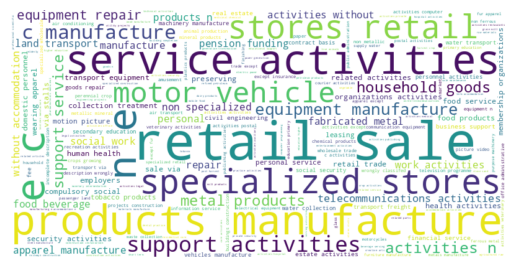

Vocabulary size (TfidfVectorizer): 690

Cluster counts:
 industry_cluster
0    71841
1    57968
2    45014
3    15607
4     4715
Name: count, dtype: int64


In [34]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("/content/cleaned_resource_management.csv")

# Make sure relevant columns exist
if "nic_name" not in df.columns: # Changed from "industry" to "nic_name"
    raise ValueError("Column 'nic_name' not found!")
if "industry" not in df.columns:
    print("Warning: 'industry' column not found. Some downstream steps might be affected.")

# Clean text - Use 'nic_name' and keep more characters
def clean_text(s):
    s = str(s).lower()
    # Keep letters, numbers, spaces, and hyphens
    s = re.sub(r'[^a-z0-9\s-]', ' ', s)
    return s.strip()

# Use 'nic_name' for cleaning
df["text_for_nlp"] = df["nic_name"].apply(clean_text)

print("Head of cleaned text for NLP:\n", df["text_for_nlp"].head()) # Debug print

# Word frequency
# Adjusted max_features and added min_df
cv = CountVectorizer(stop_words="english", max_features=1000, min_df=5) # Increased max_features, adjusted min_df
try:
    X_cv = cv.fit_transform(df["text_for_nlp"]) # Use 'text_for_nlp'
    words = cv.get_feature_names_out()
    print(f"Vocabulary size (CountVectorizer): {len(words)}") # Debug print
    if len(words) > 0:
        counts = X_cv.toarray().sum(axis=0)
        freq = pd.DataFrame({"word": words, "count": counts}).sort_values("count", ascending=False)
        print("Top words:\n", freq.head(20)) # Print top 20 words
    else:
        print("Warning: CountVectorizer created an empty vocabulary.")
except ValueError as e:
    print(f"Error during CountVectorizer fit_transform: {e}")


# Wordcloud - Generate only if vocabulary is not empty
if 'words' in locals() and len(words) > 0:
    # Generate wordcloud from the cleaned text column
    wc = WordCloud(width=800, height=400, background_color="white").generate(" ".join(df["text_for_nlp"].dropna())) # Use 'text_for_nlp' and dropna
    plt.imshow(wc, interpolation="bilinear"); plt.axis("off"); plt.show()
else:
    print("Warning: Cannot generate wordcloud due to empty vocabulary.")


# TF-IDF + Clustering - Proceed only if TF-IDF can create a vocabulary
tfidf = TfidfVectorizer(stop_words="english", max_features=5000, min_df=5) # Adjusted max_features and min_df
try:
    X_tfidf = tfidf.fit_transform(df["text_for_nlp"]) # Use 'text_for_nlp'
    print(f"Vocabulary size (TfidfVectorizer): {len(tfidf.get_feature_names_out())}") # Debug print

    # Ensure there are enough samples and features for clustering
    if X_tfidf.shape[0] > 0 and X_tfidf.shape[1] > 0:
        kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
        df["industry_cluster"] = kmeans.fit_predict(X_tfidf)

        print("\nCluster counts:\n", df["industry_cluster"].value_counts())
    else:
        print("Warning: Insufficient data or features for TF-IDF clustering.")
        df["industry_cluster"] = -1 # Assign a default value

except ValueError as e:
    print(f"Error during TfidfVectorizer fit_transform or clustering: {e}")
    print("Cannot perform TF-IDF clustering due to vocabulary issue or other error.")
    df["industry_cluster"] = -1 # Assign a default value if clustering fails
except Exception as e: # Catch other potential errors during clustering
     print(f"An unexpected error occurred during TF-IDF clustering: {e}")
     df["industry_cluster"] = -1 # Assign a default value if clustering fails

In [35]:
df.to_csv("/content/resource_with_clusters.csv", index=False)
print("✅ Saved clustered dataset: /content/resource_with_clusters.csv")


✅ Saved clustered dataset: /content/resource_with_clusters.csv


In [36]:
# Basic checks
print(df['industry'].head(10))
print("Nulls in industry:", df['industry'].isnull().sum())

# If missing or different name, inspect columns and choose a text column
# For safety, fill missing industry with empty string
df['industry'] = df['industry'].fillna("").astype(str)


0    `000
1    `000
2    `011
3    `011
4    `011
5    `011
6    `011
7    `011
8    `011
9    `012
Name: industry, dtype: object
Nulls in industry: 0


In [37]:
def clean_text(s):
    s = str(s).lower()
    s = re.sub(r'[\r\n\t]', ' ', s)            # whitespace
    s = re.sub(r'[^a-z0-9\s]', ' ', s)         # keep alphanumeric + spaces
    s = re.sub(r'\s+', ' ', s).strip()
    return s

df['industry_clean'] = df['industry'].apply(clean_text)
df['industry_clean'].head()


,industry_clean
0,000
1,000
2,011
3,011
4,011


## tokenization+stopwords+lemmatization

In [38]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOP = set(stopwords.words('english'))

def tokenize_and_filter(text):
    tokens = [t for t in text.split() if t not in STOP and len(t) > 1]
    return " ".join(tokens)

df['industry_tokens'] = df['industry_clean'].apply(tokenize_and_filter)
df['industry_tokens'].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,industry_tokens
0,000
1,000
2,011
3,011
4,011


## Exploratory text stats (word frequency & wordcloud)

In [39]:
print(df['industry'].head(10))
print(df['industry_clean'].head(10))


0    `000
1    `000
2    `011
3    `011
4    `011
5    `011
6    `011
7    `011
8    `011
9    `012
Name: industry, dtype: object
0    000
1    000
2    011
3    011
4    011
5    011
6    011
7    011
8    011
9    012
Name: industry_clean, dtype: object


In [40]:
print(df['industry_clean'].head(20))
print("Total non-empty:", (df['industry_clean']!="").sum())


0     000
1     000
2     011
3     011
4     011
5     011
6     011
7     011
8     011
9     012
10    012
11    012
12    012
13    012
14    012
15    012
16    012
17    012
18    013
19    013
Name: industry_clean, dtype: object
Total non-empty: 195145


In [42]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head(5).T)   # transpose so we see all columns


Shape: (195145, 32)
Columns: ['state_code', 'district_code', 'state', 'division', 'industry', 'class', 'nic_name', 'count', 'main_workers_-_total_-_males', 'main_workers_-_total_-_females', 'main_workers_-_rural_-__persons', 'main_workers_-_rural_-_males', 'main_workers_-_rural_-_females', 'main_workers_-_urban_-__persons', 'main_workers_-_urban_-_males', 'main_workers_-_urban_-_females', 'marginal_workers_-_total_-__persons', 'marginal_workers_-_total_-_males', 'marginal_workers_-_total_-_females', 'marginal_workers_-_rural_-__persons', 'marginal_workers_-_rural_-_males', 'marginal_workers_-_rural_-_females', 'marginal_workers_-_urban_-__persons', 'marginal_workers_-_urban_-_males', 'marginal_workers_-_urban_-_females', '__source_file', 'bucket_rule', 'bucket_nlp', 'text_for_nlp', 'industry_cluster', 'industry_clean', 'industry_tokens']
                                                                                   0  \
state_code                                                    

In [43]:
if "industry" in df.columns:
    print("Non-empty rows in industry:", (df["industry"].astype(str).str.strip() != "").sum())
    print(df["industry"].dropna().unique()[:20])  # first 20 unique values
else:
    print("⚠️ Column 'industry' not found. Available:", df.columns.tolist())


Non-empty rows in industry: 195145
['`000' '`011' '`012' '`013' '`014' '`015' '`016' '`017' '`021' '`022'
 '`023' '`024' '`031' '`032' '`051' '`052' '`061' '`062' '`071' '`072']


In [44]:
def clean_text(s):
    s = str(s).lower()
    s = re.sub(r'[^a-z0-9\s-]', ' ', s)   # keep letters, numbers, hyphens
    s = re.sub(r'\s+', ' ', s).strip()
    return s

df['industry_clean'] = df['industry'].fillna("").apply(clean_text)
print(df['industry_clean'].head(10))


0    000
1    000
2    011
3    011
4    011
5    011
6    011
7    011
8    011
9    012
Name: industry_clean, dtype: object


##TF-IDF representation (for clustering/topic modeling)

In [46]:
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
X_tfidf = tfidf.fit_transform(df['industry_tokens'])
print("TF-IDF shape:", X_tfidf.shape)


TF-IDF shape: (195145, 241)


In [47]:
# SVD (LSA)
svd = TruncatedSVD(n_components=100, random_state=42)
X_reduced = svd.fit_transform(X_tfidf)  # shape: (n_samples, 100)
print("Reduced shape:", X_reduced.shape)


Reduced shape: (195145, 100)


In [56]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import datetime as dt

# Read in the dataset
# Removed index_col='Unnamed: 0' as this column does not exist in the saved CSV
state = pd.read_csv('/content/merged_dataset.csv')
state.head()

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females,__source_file
0,`08,`000,STATE - RAJASTHAN,`00,`000,`0000,Total,9017944,7594737,1423207,...,2307752,1046813,1260939,1825830,749381,1076449,481922,297432,184490,DDW_B18_0800_NIC_FINAL_STATE_RAJASTHAN-2011.csv
1,`08,`000,STATE - RAJASTHAN,`01,`000,`0000,"Crop and animal production, hunting and relate...",450766,201572,249194,...,408728,76106,332622,390864,71124,319740,17864,4982,12882,DDW_B18_0800_NIC_FINAL_STATE_RAJASTHAN-2011.csv
2,`08,`000,STATE - RAJASTHAN,`01,`011,`0000,Growing of non-perennial crops,12876,10547,2329,...,9562,4051,5511,8147,3295,4852,1415,756,659,DDW_B18_0800_NIC_FINAL_STATE_RAJASTHAN-2011.csv
3,`08,`000,STATE - RAJASTHAN,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",12061,9911,2150,...,9085,3883,5202,7777,3161,4616,1308,722,586,DDW_B18_0800_NIC_FINAL_STATE_RAJASTHAN-2011.csv
4,`08,`000,STATE - RAJASTHAN,`01,`011,`0112,Growing of rice,79,71,8,...,13,4,9,11,2,9,2,2,0,DDW_B18_0800_NIC_FINAL_STATE_RAJASTHAN-2011.csv


In [57]:
state.dtypes

,0
State Code,object
District Code,object
India/States,object
Division,object
Group,object
Class,object
NIC Name,object
Main Workers - Total - Persons,int64
Main Workers - Total - Males,int64
Main Workers - Total - Females,int64


## data filtering

In [65]:
# IQR based filtering Technique:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/merged_dataset.csv')
df

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females,__source_file
0,`08,`000,STATE - RAJASTHAN,`00,`000,`0000,Total,9017944,7594737,1423207,...,2307752,1046813,1260939,1825830,749381,1076449,481922,297432,184490,DDW_B18_0800_NIC_FINAL_STATE_RAJASTHAN-2011.csv
1,`08,`000,STATE - RAJASTHAN,`01,`000,`0000,"Crop and animal production, hunting and relate...",450766,201572,249194,...,408728,76106,332622,390864,71124,319740,17864,4982,12882,DDW_B18_0800_NIC_FINAL_STATE_RAJASTHAN-2011.csv
2,`08,`000,STATE - RAJASTHAN,`01,`011,`0000,Growing of non-perennial crops,12876,10547,2329,...,9562,4051,5511,8147,3295,4852,1415,756,659,DDW_B18_0800_NIC_FINAL_STATE_RAJASTHAN-2011.csv
3,`08,`000,STATE - RAJASTHAN,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",12061,9911,2150,...,9085,3883,5202,7777,3161,4616,1308,722,586,DDW_B18_0800_NIC_FINAL_STATE_RAJASTHAN-2011.csv
4,`08,`000,STATE - RAJASTHAN,`01,`011,`0112,Growing of rice,79,71,8,...,13,4,9,11,2,9,2,2,0,DDW_B18_0800_NIC_FINAL_STATE_RAJASTHAN-2011.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195140,`21,`399,District - Malkangiri,`99,`000,`0000,Activities of extraterritorial organizations a...,574,315,259,...,1222,294,928,1176,286,890,46,8,38,DDW_B18st_2100_NIC_FINAL_STATE_ODISHA-2011.csv
195141,`21,`399,District - Malkangiri,`99,`991,`0000,Blank,435,266,169,...,586,202,384,558,198,360,28,4,24,DDW_B18st_2100_NIC_FINAL_STATE_ODISHA-2011.csv
195142,`21,`399,District - Malkangiri,`99,`991,`9910,Blank,435,266,169,...,586,202,384,558,198,360,28,4,24,DDW_B18st_2100_NIC_FINAL_STATE_ODISHA-2011.csv
195143,`21,`399,District - Malkangiri,`99,`992,`0000,Incomplete description/ Wrongly Classifed,139,49,90,...,636,92,544,618,88,530,18,4,14,DDW_B18st_2100_NIC_FINAL_STATE_ODISHA-2011.csv


<Axes: ylabel='Division'>

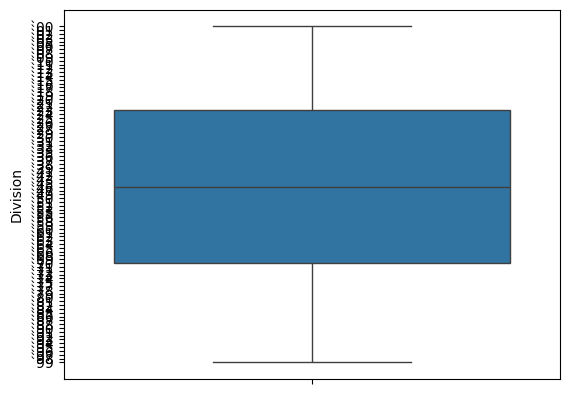

In [68]:
# Use the correct column name
sns.boxplot(df["Division"])

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your merged dataset
df = pd.read_csv("/content/merged_dataset.csv")

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head(3).T)   # see sample values for each column


Shape: (195145, 26)
Columns: ['State Code', 'District Code', 'India/States', 'Division', 'Group', 'Class', 'NIC Name', 'Main Workers - Total -  Persons', 'Main Workers - Total - Males', 'Main Workers - Total - Females', 'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males', 'Main Workers - Rural - Females', 'Main Workers - Urban -  Persons', 'Main Workers - Urban - Males', 'Main Workers - Urban - Females', 'Marginal Workers - Total -  Persons', 'Marginal Workers - Total - Males', 'Marginal Workers - Total - Females', 'Marginal Workers - Rural -  Persons', 'Marginal Workers - Rural - Males', 'Marginal Workers - Rural - Females', 'Marginal Workers - Urban -  Persons', 'Marginal Workers - Urban - Males', 'Marginal Workers - Urban - Females', '__source_file']
                                                                                   0  \
State Code                                                                       `08   
District Code                                 

  State Code District Code       India/States Division Group  Class  \
0        `08          `000  STATE - RAJASTHAN      `00  `000  `0000   
1        `08          `000  STATE - RAJASTHAN      `01  `000  `0000   
2        `08          `000  STATE - RAJASTHAN      `01  `011  `0000   
3        `08          `000  STATE - RAJASTHAN      `01  `011  `0111   
4        `08          `000  STATE - RAJASTHAN      `01  `011  `0112   

                                            NIC Name  \
0                                              Total   
1  Crop and animal production, hunting and relate...   
2                     Growing of non-perennial crops   
3  Growing of cereals (except rice), leguminous c...   
4                                    Growing of rice   

   Main Workers - Total -  Persons  Main Workers - Total - Males  \
0                          9017944                       7594737   
1                           450766                        201572   
2                            128

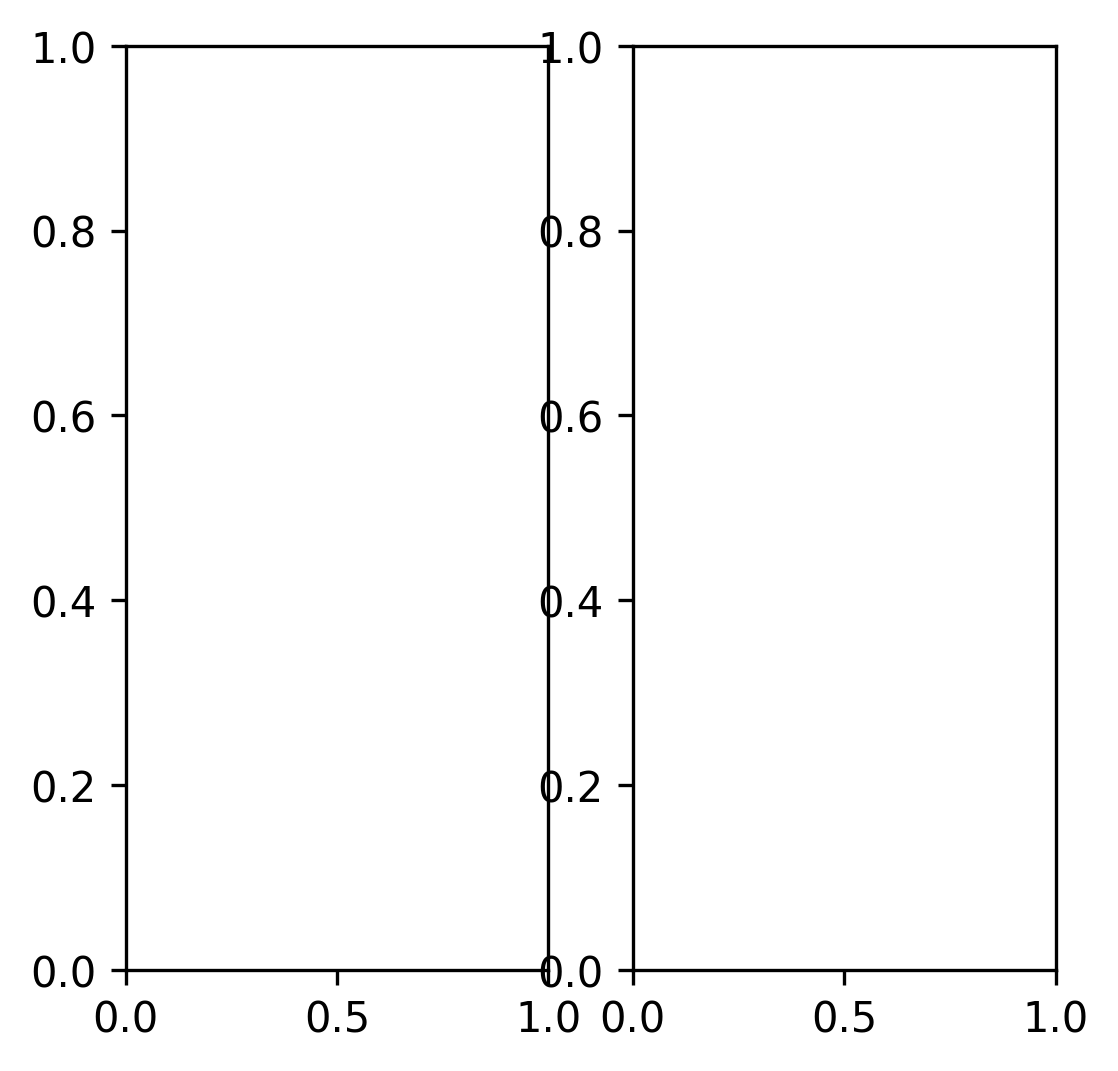

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
csv="/content/merged_dataset.csv"
df=pd.read_csv(csv) # Changed url to csv
print(df.head(5))
print(df.shape)

# Note: The following plotting code uses placeholder column names ('grade_test1', 'grade_test2', 'id')
# which are likely not present in your dataset. You will need to replace these
# with the actual column names from your DataFrame that you want to plot.

fig=plt.figure(figsize=(4,4), dpi=300)
test1 = fig.add_subplot(1,2,1)#nrows, ncols, index
test2 = fig.add_subplot(1,2,2)
#test3 = fig.add_subplot(2,2,2)
#pos is a three-digit integer where the first, second, and third integer are nrows,ncols, index.
# Replace 'grade_test1' and 'grade_test2' with actual column names from your df
# test1.boxplot(df["grade_test1"],showfliers=False)#method1 #showfliers=False(Hide outliers)
# test2.boxplot(df["grade_test2"],showfliers=True)
#test3.bar(df["grade_test2"],df["id"])


# Replace 'grade_test1' and 'grade_test2' with actual column names from your df
# plot = df[['grade_test1', 'grade_test2']].plot(kind='box', title='boxplot', showmeans=True)#method2


plt.show()

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your merged dataset
df = pd.read_csv("/content/merged_dataset.csv")

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head(3).T)   # see sample values for each column


Shape: (195145, 26)
Columns: ['State Code', 'District Code', 'India/States', 'Division', 'Group', 'Class', 'NIC Name', 'Main Workers - Total -  Persons', 'Main Workers - Total - Males', 'Main Workers - Total - Females', 'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males', 'Main Workers - Rural - Females', 'Main Workers - Urban -  Persons', 'Main Workers - Urban - Males', 'Main Workers - Urban - Females', 'Marginal Workers - Total -  Persons', 'Marginal Workers - Total - Males', 'Marginal Workers - Total - Females', 'Marginal Workers - Rural -  Persons', 'Marginal Workers - Rural - Males', 'Marginal Workers - Rural - Females', 'Marginal Workers - Urban -  Persons', 'Marginal Workers - Urban - Males', 'Marginal Workers - Urban - Females', '__source_file']
                                                                                   0  \
State Code                                                                       `08   
District Code                                 

In [63]:
# Get numeric columns only
numeric_cols = df.select_dtypes(include="number").columns.tolist()
print("Numeric columns:", numeric_cols)


Numeric columns: ['Main Workers - Total -  Persons', 'Main Workers - Total - Males', 'Main Workers - Total - Females', 'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males', 'Main Workers - Rural - Females', 'Main Workers - Urban -  Persons', 'Main Workers - Urban - Males', 'Main Workers - Urban - Females', 'Marginal Workers - Total -  Persons', 'Marginal Workers - Total - Males', 'Marginal Workers - Total - Females', 'Marginal Workers - Rural -  Persons', 'Marginal Workers - Rural - Males', 'Marginal Workers - Rural - Females', 'Marginal Workers - Urban -  Persons', 'Marginal Workers - Urban - Males', 'Marginal Workers - Urban - Females']


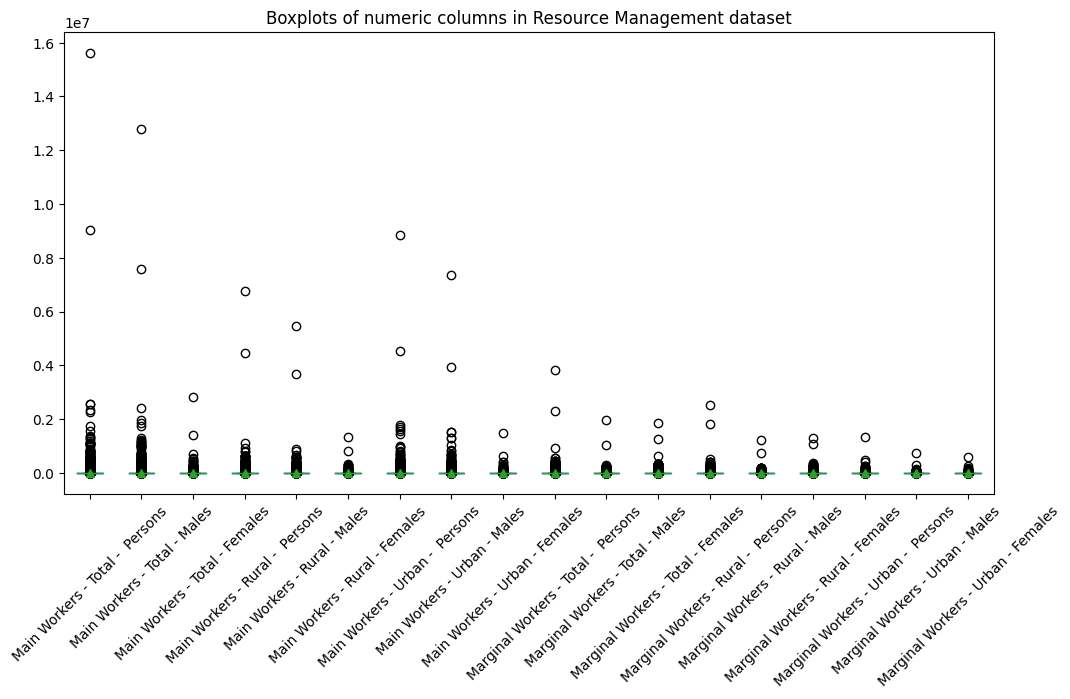

In [64]:
df[numeric_cols].plot(
    kind="box",
    figsize=(12,6),
    title="Boxplots of numeric columns in Resource Management dataset",
    showmeans=True
)
plt.xticks(rotation=45)
plt.show()


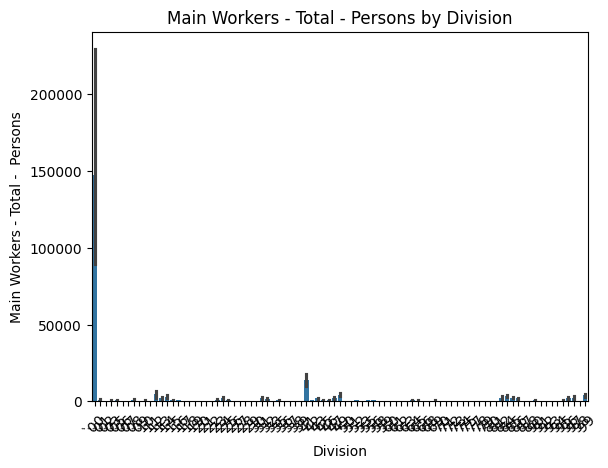

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: x = a categorical column, y = a numeric column
# Replace 'Division' and 'Main Workers - Total - Persons' with the actual column names you want to plot
sns.barplot(x="Division", y="Main Workers - Total -  Persons", data=df)

plt.xticks(rotation=45)
# Update title to reflect the columns being plotted
plt.title("Main Workers - Total - Persons by Division")
plt.show()

##NLP

In [72]:
CSV="/content/merged_dataset.csv"


import pandas as pd
df=pd.read_csv(csv)

df.head()

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females,__source_file
0,`08,`000,STATE - RAJASTHAN,`00,`000,`0000,Total,9017944,7594737,1423207,...,2307752,1046813,1260939,1825830,749381,1076449,481922,297432,184490,DDW_B18_0800_NIC_FINAL_STATE_RAJASTHAN-2011.csv
1,`08,`000,STATE - RAJASTHAN,`01,`000,`0000,"Crop and animal production, hunting and relate...",450766,201572,249194,...,408728,76106,332622,390864,71124,319740,17864,4982,12882,DDW_B18_0800_NIC_FINAL_STATE_RAJASTHAN-2011.csv
2,`08,`000,STATE - RAJASTHAN,`01,`011,`0000,Growing of non-perennial crops,12876,10547,2329,...,9562,4051,5511,8147,3295,4852,1415,756,659,DDW_B18_0800_NIC_FINAL_STATE_RAJASTHAN-2011.csv
3,`08,`000,STATE - RAJASTHAN,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",12061,9911,2150,...,9085,3883,5202,7777,3161,4616,1308,722,586,DDW_B18_0800_NIC_FINAL_STATE_RAJASTHAN-2011.csv
4,`08,`000,STATE - RAJASTHAN,`01,`011,`0112,Growing of rice,79,71,8,...,13,4,9,11,2,9,2,2,0,DDW_B18_0800_NIC_FINAL_STATE_RAJASTHAN-2011.csv


In [76]:
df["Marginal Workers - Rural - Males"].unique()

array([749381,  71124,   3295, ...,   8490,   1294,   1957])

In [77]:
df.shape

(195145, 26)

In [81]:
df_text=df[["Marginal Workers - Rural - Males"]]
df_text.head()

,Marginal Workers - Rural - Males
0,749381
1,71124
2,3295
3,3161
4,2


## Load and clean ext data

In [86]:
import pandas as pd
import re

df = pd.read_csv("/content/merged_dataset.csv")

# choose the industry column (replace if different)
text_col = "industry" if "industry" in df.columns else df.columns[0]

def clean_text(s):
    s = "" if pd.isna(s) else str(s)
    s = s.lower()
    s = re.sub(r"[^a-z0-9\s-]", " ", s)  # keep letters/numbers/hyphen
    s = re.sub(r"\s+", " ", s).strip()
    return s

df["industry_clean"] = df[text_col].apply(clean_text)


##tokenization and stop words

In [87]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
STOP = set(ENGLISH_STOP_WORDS)

df["industry_tokens"] = df["industry_clean"].apply(
    lambda x: " ".join([w for w in x.split() if w not in STOP and len(w)>1])
)


## tfid vectorization

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(df["industry_tokens"])


## clustering industries

In [90]:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import MiniBatchKMeans

# Reduce dimensions for speed
# n_components must be <= n_features. X_tfidf.shape[1] is the number of features.
# Setting n_components to 20 as an example, adjust as needed but keep it <= X_tfidf.shape[1]
svd = TruncatedSVD(n_components=20, random_state=42)
X_reduced = svd.fit_transform(X_tfidf)  # shape: (n_samples, n_components)
print("Reduced shape:", X_reduced.shape)

# Cluster into k groups (choose based on elbow/silhouette)
k = 6
km = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=1024, n_init=20)
df["industry_cluster"] = km.fit_predict(X_reduced)

print("\nCluster counts:")
print(df["industry_cluster"].value_counts())

Reduced shape: (195145, 20)

Cluster counts:
industry_cluster
4    110397
0     21662
5     18181
1     17527
2     15331
3     12047
Name: count, dtype: int64


## Interpret clusters (top terms)

In [91]:
import numpy as np

terms = tfidf.get_feature_names_out()
top_terms = {}
for ci in range(k):
    idxs = np.where(df["industry_cluster"]==ci)[0]
    mean_vec = X_tfidf[idxs].mean(axis=0).A1
    top_idxs = mean_vec.argsort()[::-1][:10]
    top_terms[ci] = [terms[i] for i in top_idxs]
    print(f"Cluster {ci} → {top_terms[ci]}")


Cluster 0 → ['08', '33', '34', '30', '29', '27', '32', '24', '21', '19']
Cluster 1 → ['33', '34', '32', '30', '29', '27', '24', '21', '20', '19']
Cluster 2 → ['29', '33', '34', '32', '30', '27', '24', '21', '20', '19']
Cluster 3 → ['21', '33', '34', '30', '29', '27', '32', '24', '20', '19']
Cluster 4 → ['19', '24', '18', '09', '20', '32', '10', '12', '07', '13']
Cluster 5 → ['27', '33', '34', '32', '30', '29', '24', '21', '20', '19']


## Assign human-friendly labels

In [92]:
# Example mapping (adjust based on top_terms output)
cluster_to_label = {
    0: "Agriculture",
    1: "Retail",
    2: "Manufacturing",
    3: "Construction",
    4: "Services",
    5: "Other"
}
df["industry_group"] = df["industry_cluster"].map(cluster_to_label)


## save NLP labled dataset

In [93]:
df.to_csv("/content/resource_nlp_labeled.csv", index=False)
print("✅ NLP-labeled dataset saved at /content/resource_nlp_labeled.csv")


✅ NLP-labeled dataset saved at /content/resource_nlp_labeled.csv


In [94]:
import pandas as pd

# Load merged dataset (update path if needed)
df = pd.read_csv("/content/resource_nlp_labeled.csv")

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head(5).T)   # preview data


Shape: (195145, 30)
Columns: ['State Code', 'District Code', 'India/States', 'Division', 'Group', 'Class', 'NIC Name', 'Main Workers - Total -  Persons', 'Main Workers - Total - Males', 'Main Workers - Total - Females', 'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males', 'Main Workers - Rural - Females', 'Main Workers - Urban -  Persons', 'Main Workers - Urban - Males', 'Main Workers - Urban - Females', 'Marginal Workers - Total -  Persons', 'Marginal Workers - Total - Males', 'Marginal Workers - Total - Females', 'Marginal Workers - Rural -  Persons', 'Marginal Workers - Rural - Males', 'Marginal Workers - Rural - Females', 'Marginal Workers - Urban -  Persons', 'Marginal Workers - Urban - Males', 'Marginal Workers - Urban - Females', '__source_file', 'industry_clean', 'industry_tokens', 'industry_cluster', 'industry_group']
                                                                                   0  \
State Code                                                 

In [95]:
# Drop duplicate rows
df = df.drop_duplicates()

# Drop rows where industry column is missing
if "industry" in df.columns:
    df = df.dropna(subset=["industry"])
else:
    # If column name is different, replace "industry" with actual column
    df = df.dropna(subset=[df.columns[0]])

print("After removing duplicates & nulls:", df.shape)


After removing duplicates & nulls: (195145, 30)


In [96]:
import re

# Pick the right column (assuming it's named "industry")
text_col = "industry" if "industry" in df.columns else df.columns[0]

def clean_text(s):
    s = str(s).lower()                          # lowercase
    s = re.sub(r"[^a-z0-9\s-]", " ", s)         # keep letters, numbers, hyphen
    s = re.sub(r"\s+", " ", s).strip()          # collapse multiple spaces
    return s

df["industry_clean"] = df[text_col].apply(clean_text)
print(df["industry_clean"].head(10))


0    08
1    08
2    08
3    08
4    08
5    08
6    08
7    08
8    08
9    08
Name: industry_clean, dtype: object


In [97]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
STOP = set(ENGLISH_STOP_WORDS)

def remove_stopwords(s):
    tokens = [t for t in s.split() if t not in STOP and len(t) > 1]
    return " ".join(tokens)

df["industry_tokens"] = df["industry_clean"].apply(remove_stopwords)
print(df["industry_tokens"].head(10))


0    08
1    08
2    08
3    08
4    08
5    08
6    08
7    08
8    08
9    08
Name: industry_tokens, dtype: object


In [98]:
# Drop rows that became empty after cleaning
df = df[df["industry_tokens"].str.strip() != ""].reset_index(drop=True)

print("Final cleaned dataset shape:", df.shape)


Final cleaned dataset shape: (195145, 30)


In [99]:
df.to_csv("/content/cleaned_resource_management.csv", index=False)
print("✅ Cleaned dataset saved as /content/cleaned_resource_management.csv")


✅ Cleaned dataset saved as /content/cleaned_resource_management.csv
